<a href="https://colab.research.google.com/github/serenechack/Remote-Sensing/blob/main/Lesson1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# ECE-471 Lesson 1

In [1]:
!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.8 MB/s eta 0:00:00


In [2]:
import rasterio
import geopandas as gpd
import os
import matplotlib.pyplot as plt
import numpy as np
import shapely.geometry

In [3]:
raster_file = 'https://storage.googleapis.com/krishna-skytruth-dev/ece471/week_1/m_4007317_nw_18_060_20211105.tif'
vector_file = 'https://storage.googleapis.com/krishna-skytruth-dev/ece471/week_1/School_Districts.geojson'

In [ ]:
# Load the raster file

In [5]:
src = rasterio.open(raster_file)

In [6]:
src.profile

{'driver': 'GTiff', 'dtype': 'uint8', 'nodata': None, 'width': 10002, 'height': 12575, 'count': 4, 'crs': CRS.from_epsg(26918), 'transform': Affine(0.6, 0.0, 584119.8,
       0.0, -0.6, 4511848.2), 'blockysize': 1, 'tiled': False, 'interleave': 'pixel'}

In [7]:
src.bounds

BoundingBox(left=584119.8, bottom=4504303.2, right=590121.0, top=4511848.2)

In [8]:
src.crs

CRS.from_epsg(26918)

In [9]:
src.transform

Affine(0.6, 0.0, 584119.8,
       0.0, -0.6, 4511848.2)

In [ ]:
# Plot the raster file

In [10]:
# this reads all the bands in a single shot
arr = src.read()

In [11]:
arr.shape

(4, 12575, 10002)

In [12]:
# split out band by index
red = arr[0, :, :]
green = arr[1, :, :]
blue = arr[2, :, :]
nir = arr[3, :, :]

(-0.5, 10001.5, 12574.5, -0.5)

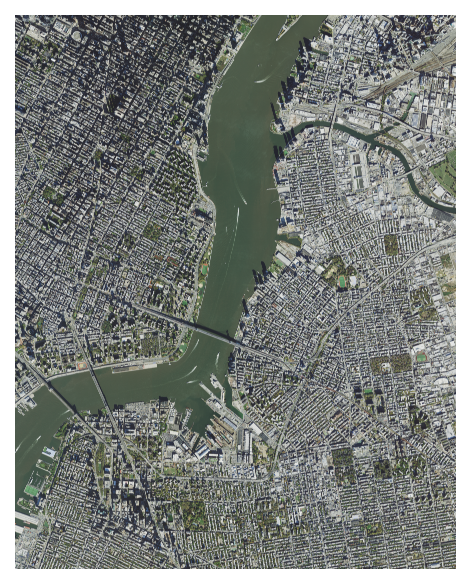

In [13]:
# plot an RGB visualization
rgb = np.stack([red, green, blue], axis=-1)
plt.figure(dpi=150)
plt.imshow(rgb)
plt.axis('off')

(-0.5, 10001.5, 12574.5, -0.5)

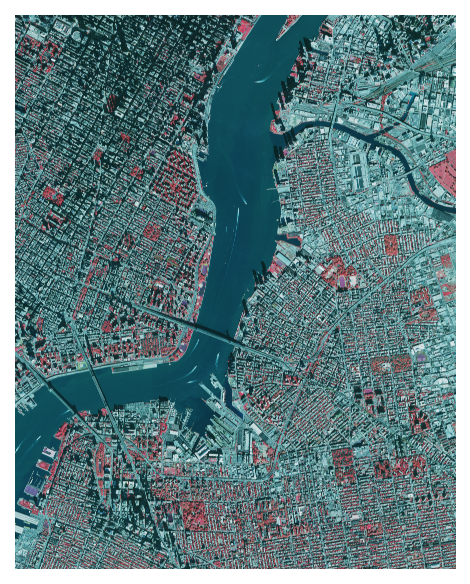

In [14]:
# plot an NRG visualization (higlights greenery in red)
nrg = np.stack([nir, red, green], axis=-1)
plt.figure(dpi=150)
plt.imshow(nrg)
plt.axis('off')

In [ ]:
# Load vector data

In [15]:
gdf = gpd.read_file(vector_file)

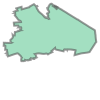

In [16]:
gdf.iloc[0].geometry

In [17]:
shapely.geometry.mapping(gdf.iloc[0].geometry)

{'type': 'MultiPolygon',
 'coordinates': [(((-73.74461376070957, 40.77894737610949),
    (-73.7442928977755, 40.778747261923485),
    (-73.74434568594884, 40.778716222376694),
    (-73.74440449980389, 40.778731270038286),
    (-73.74446801788396, 40.77879853761164),
    (-73.74454629643579, 40.77885465064572),
    (-73.7446156802704, 40.77867206964332),
    (-73.74481235604428, 40.77855689759693),
    (-73.74484149177096, 40.77863527688375),
    (-73.74493373117403, 40.77888907221684),
    (-73.74506031215944, 40.779142942942684),
    (-73.7450024879486, 40.77919897460485),
    (-73.74461376070957, 40.77894737610949)),),
  (((-73.7467245715036, 40.78030652579971),
    (-73.74559224340433, 40.779580678768546),
    (-73.74573554275209, 40.779610594388096),
    (-73.7458187294903, 40.77966671687346),
    (-73.74588765460679, 40.779603471321984),
    (-73.7460789852557, 40.779603893075894),
    (-73.7462557113445, 40.77957444813873),
    (-73.74649167760953, 40.77944817219302),
    (-73.74

<Axes: >

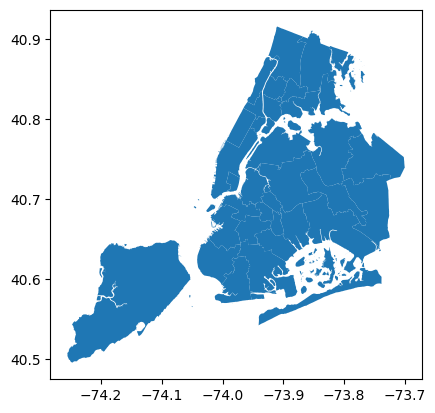

In [18]:
gdf.plot()